In [126]:
from google.colab import files
import seaborn as sns
import io
import pandas as pd
import numpy as np
import statsmodels.api as sm
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import r2_score
from scipy import signal

In [ ]:
def dataloader(data, na, nb, d):

    # Initialize empty arrays for lagged features
    y = data['y']
    u = data['u']
    X = pd.DataFrame()


    # Create lagged features for output ('a' parameters)
    for i in range(1,na+1):
        X['y-{}'.format(i)] = y.shift(i)
    # Create lagged features for input ('b' parameters)
    for i in range(0,nb):
        X['u-{}'.format(i + d)] = u.shift(i + d)


    #Only select data after a certain value
    X = X.iloc[max(na,nb+d):]
    # Set the target values
    y = y[max(na,nb+d):]

    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    return X, y

def r_2(y, y_hat):

  y_mean = np.mean(y)
  y_hat_mean = np.mean(y_hat)
  sst = np.sum((y - y_mean) ** 2)
  ssr = np.sum((y - y_hat_mean) ** 2)
  r_squared = 1 - (ssr / sst)


  #print("SSR:", ssr)
  #print("SST:", sst)
  #print("Mean of y:", y_mean)
  #print("Variance of y:", np.var(y))

  return r_squared

# 1º Practical assignment

In [ ]:
uploaded = files.upload()

Saving MOB_Dataset1_A6_M12.csv to MOB_Dataset1_A6_M12.csv
Saving MOB_Dataset1_A6_M11.csv to MOB_Dataset1_A6_M11.csv
Saving MOB_Dataset1_A5_M9.csv to MOB_Dataset1_A5_M9.csv
Saving MOB_Dataset1_A5_M10.csv to MOB_Dataset1_A5_M10.csv
Saving MOB_Dataset1_A4_M8.csv to MOB_Dataset1_A4_M8.csv
Saving MOB_Dataset1_A4_M7.csv to MOB_Dataset1_A4_M7.csv
Saving MOB_Dataset1_A3_M6.csv to MOB_Dataset1_A3_M6.csv
Saving MOB_Dataset1_A3_M5.csv to MOB_Dataset1_A3_M5.csv
Saving MOB_Dataset1_A2_M4.csv to MOB_Dataset1_A2_M4.csv
Saving MOB_Dataset1_A2_M3.csv to MOB_Dataset1_A2_M3.csv
Saving MOB_Dataset1_A1_M2.csv to MOB_Dataset1_A1_M2.csv
Saving MOB_Dataset1_A1_M1.csv to MOB_Dataset1_A1_M1.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
A1M1_df = pd.read_csv('MOB_Dataset1_A1_M1.csv', names=['y','u'])
A1M2_df = pd.read_csv('MOB_Dataset1_A1_M2.csv', names=['y','u'])
A2M1_df = pd.read_csv('MOB_Dataset1_A2_M3.csv', names=['y','u'])
A2M2_df = pd.read_csv('MOB_Dataset1_A2_M4.csv', names=['y','u'])
A3M1_df = pd.read_csv('MOB_Dataset1_A3_M5.csv', names=['y','u'])
A3M2_df = pd.read_csv('MOB_Dataset1_A3_M6.csv', names=['y','u'])
A4M1_df = pd.read_csv('MOB_Dataset1_A4_M7.csv', names=['y','u'])
A4M2_df = pd.read_csv('MOB_Dataset1_A4_M8.csv', names=['y','u'])
A5M1_df = pd.read_csv('MOB_Dataset1_A5_M9.csv', names=['y','u'])
A5M2_df = pd.read_csv('MOB_Dataset1_A5_M10.csv', names=['y','u'])
A6M1_df = pd.read_csv('MOB_Dataset1_A6_M11.csv', names=['y','u'])
A6M2_df = pd.read_csv('MOB_Dataset1_A6_M12.csv', names=['y','u'])

athlete_list = [A1M1_df, A1M2_df, A2M1_df, A2M2_df, A3M1_df, A3M2_df, A4M1_df, A4M2_df, A5M1_df, A5M2_df, A6M1_df, A6M2_df]
code_name = ['A1M1', 'A1M2', 'A2M1', 'A2M2', 'A3M1', 'A3M2', 'A4M1', 'A4M2', 'A5M1', 'A5M2', 'A6M1', 'A6M2']

Athlete:(7743, 2)
Athlete:(4460, 2)
Athlete:(7743, 2)
Athlete:(4460, 2)
Athlete:(5895, 2)
Athlete:(4626, 2)
Athlete:(6823, 2)
Athlete:(4906, 2)
Athlete:(6823, 2)
Athlete:(4906, 2)
Athlete:(6823, 2)
Athlete:(4906, 2)


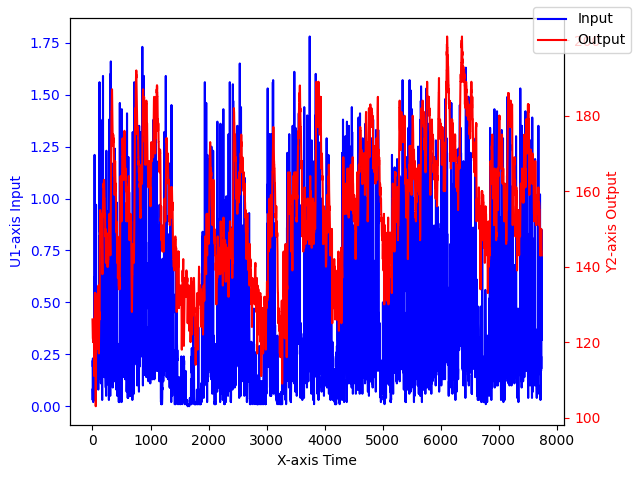

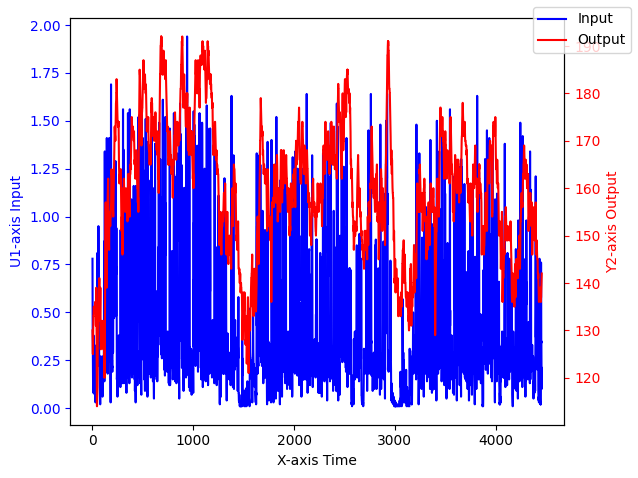

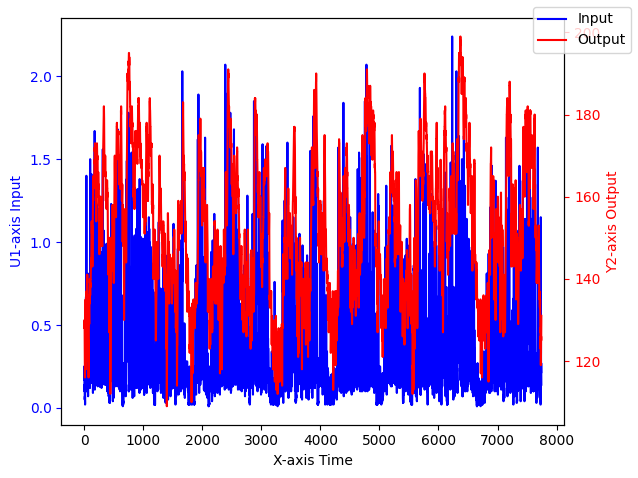

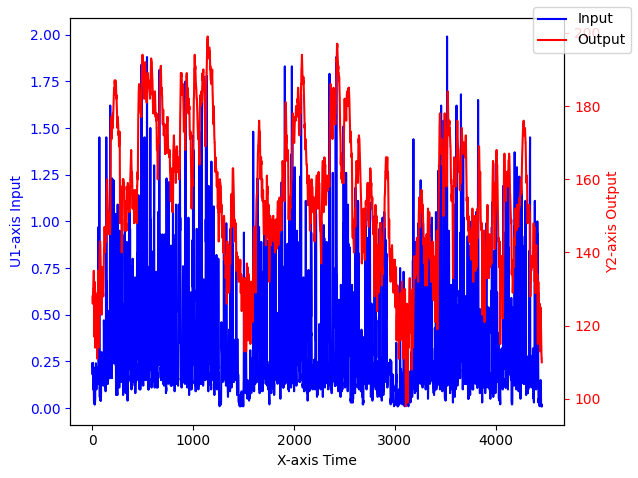

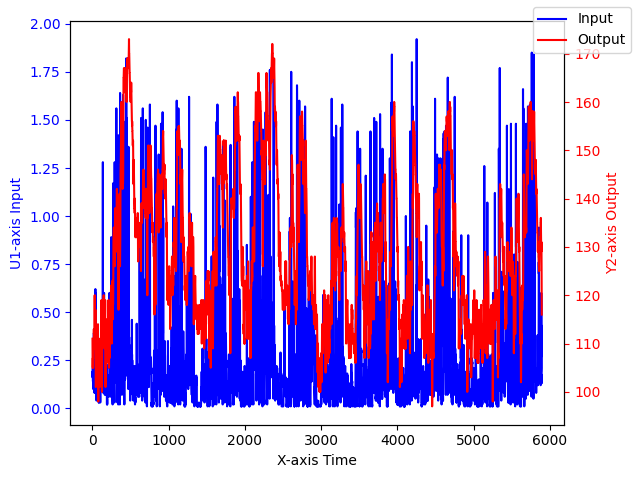

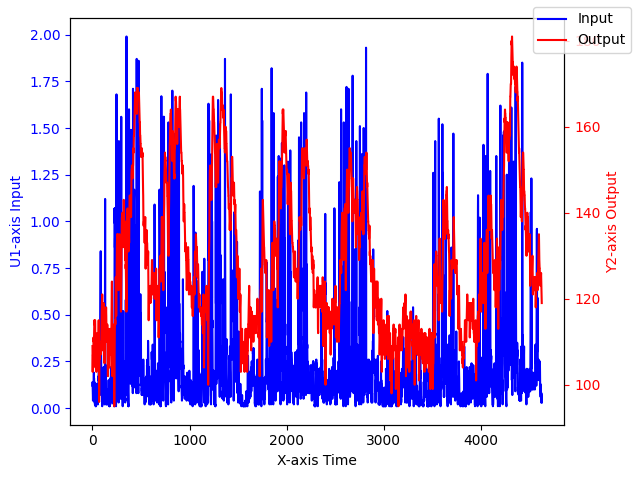

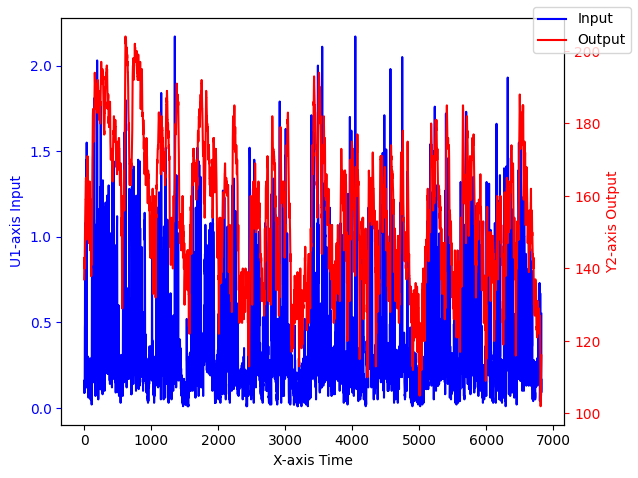

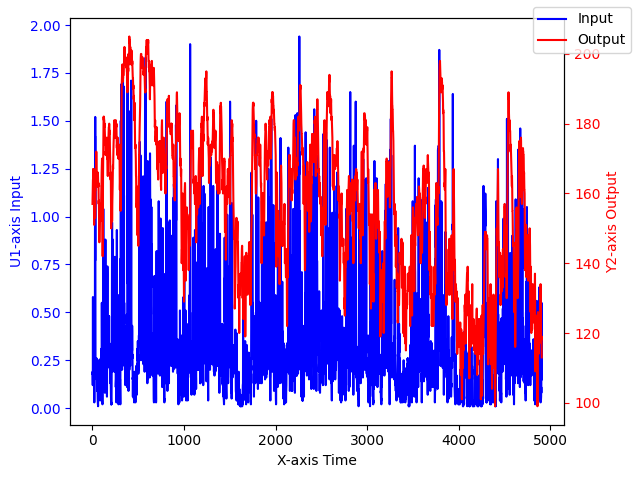

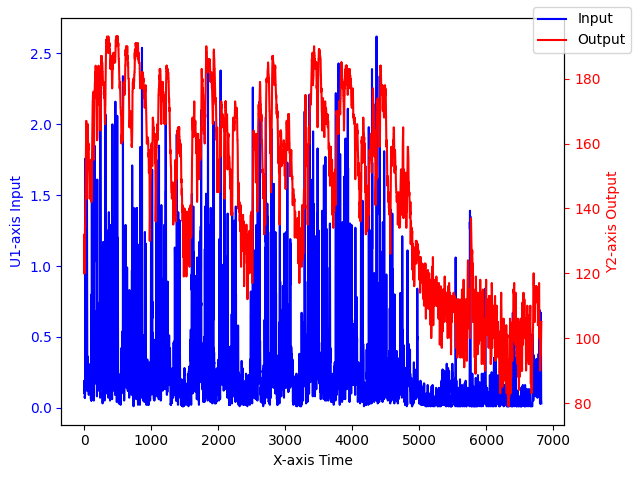

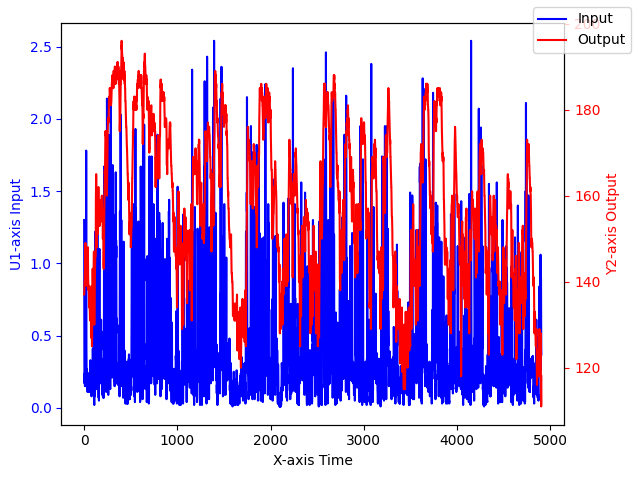

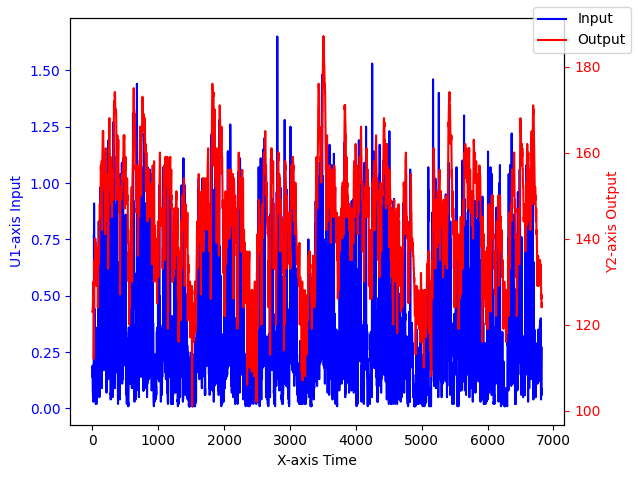

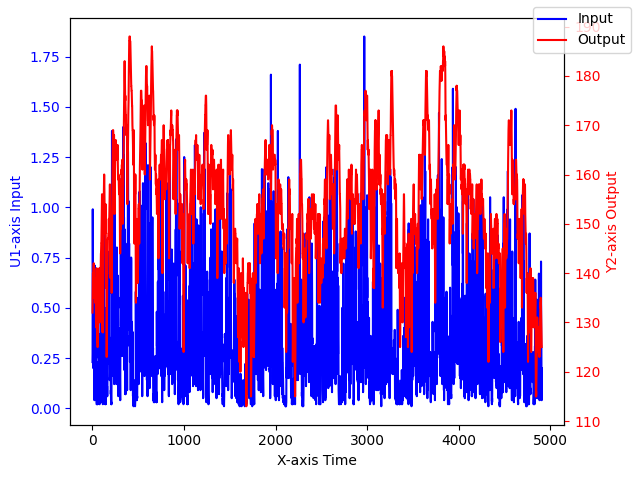

In [ ]:
#1ºData Preparation
#Pre-processing && Ploting

for athlete in athlete_list:
  #Start all values at Zero
  #athlete['u'] = athlete['u'] - athlete['u'][0]
  #athlete['y'] = athlete['y'] - athlete['y'][0]
  print(f"Athlete:{athlete.shape}")

  #Ploting using two axis with different scales
  fig, ax1 = plt.subplots()
  ax1.plot(athlete['u'], color='blue', label='Input')
  ax1.set_xlabel('X-axis Time')
  ax1.set_ylabel('U1-axis Input', color='blue')
  ax1.tick_params('y', colors='blue')
  ax2 = ax1.twinx()

  #print("Mean of y:", y_mean)
  #print("Variance of y:", np.var(y))
  ax2.plot(athlete['y'], color='red', label='Output')
  ax2.set_ylabel('Y2-axis Output', color='red')
  ax2.tick_params('y', colors='red')
  fig.legend(loc="upper right")
  fig.tight_layout()


## 2º System Identification

Athlete: A1M1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
<ipython-input-122-ae410f67563a>:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: Future

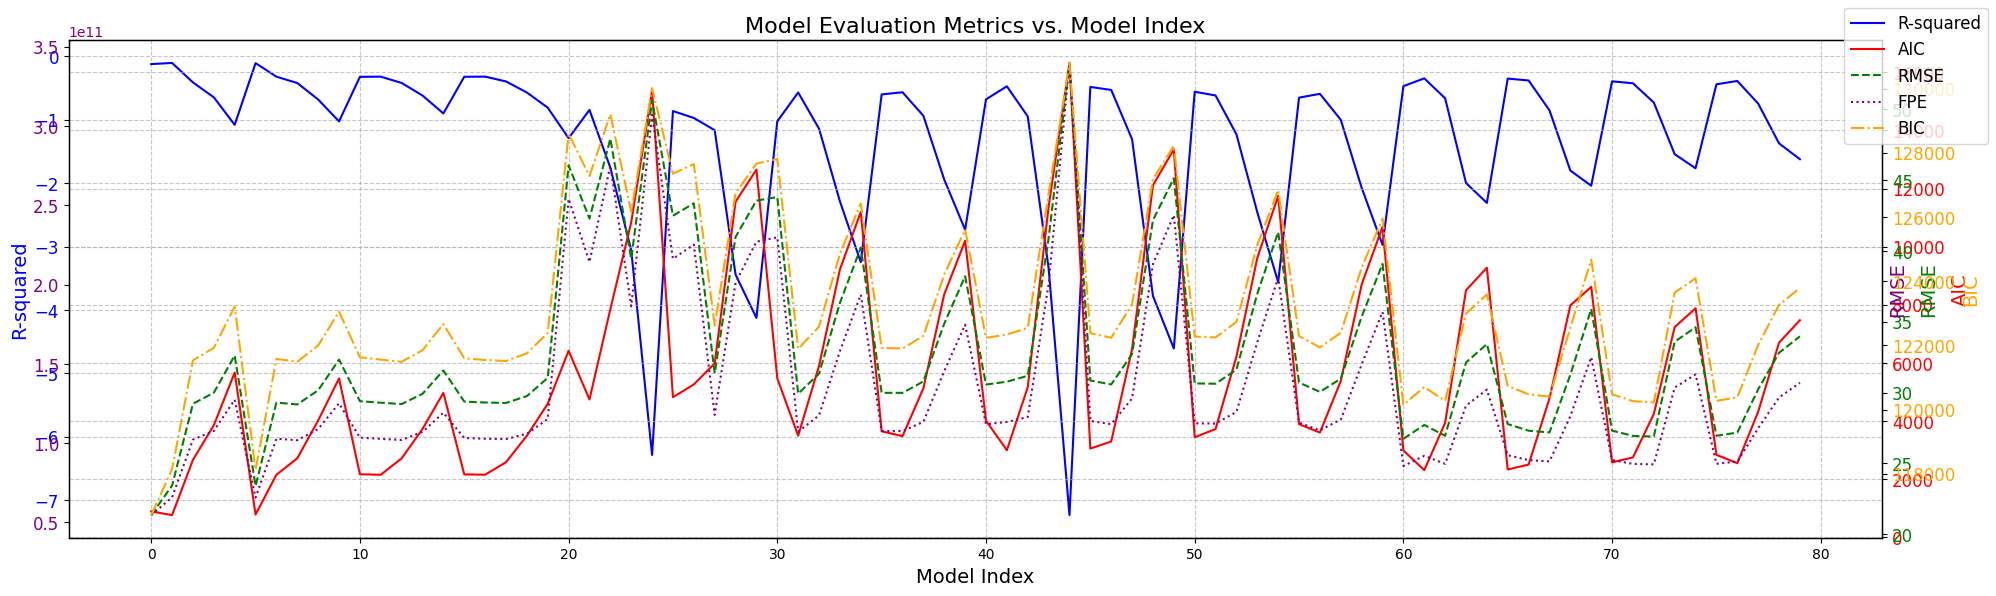

Athlete: A1M2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

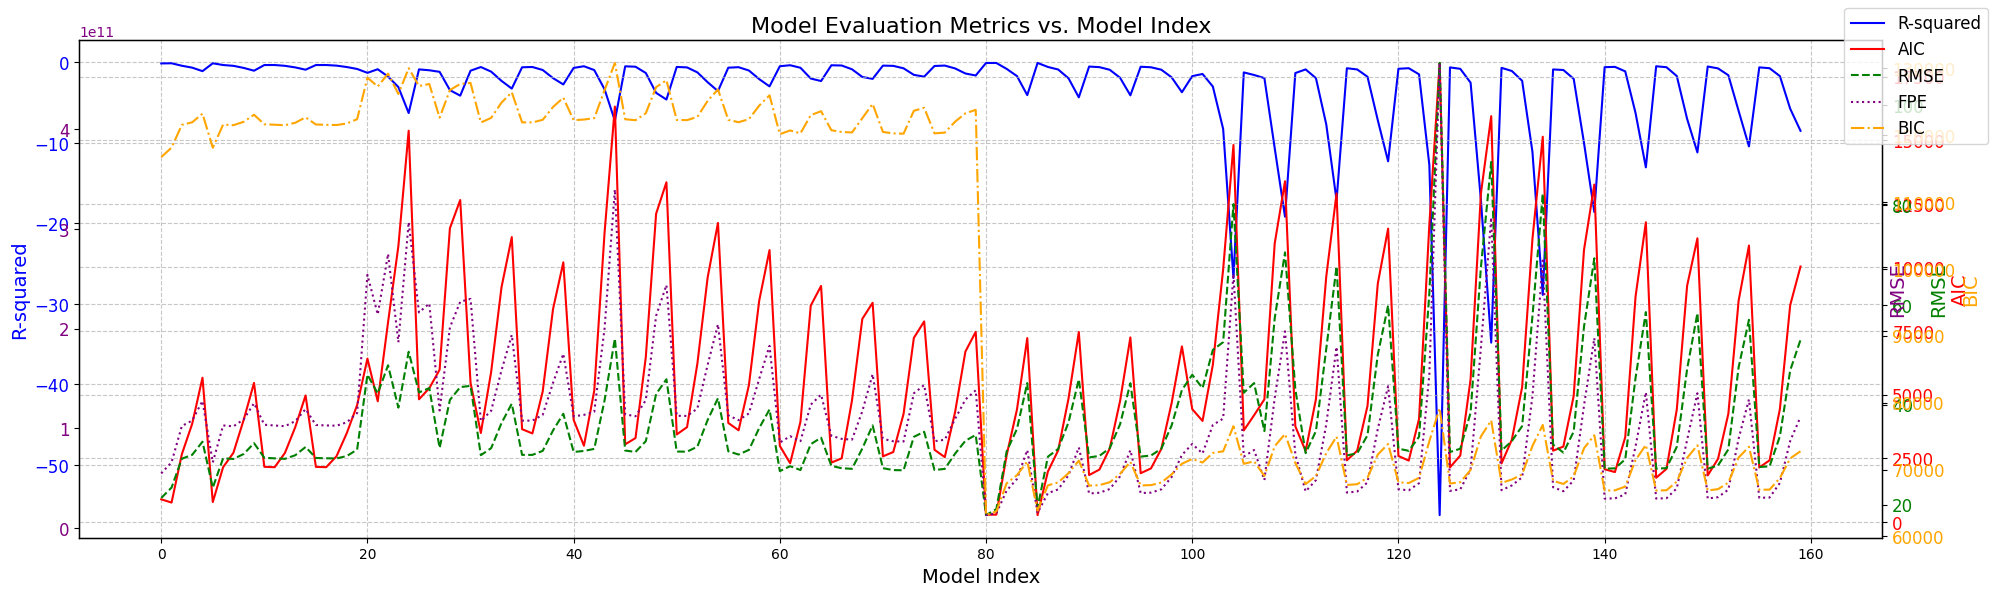

Athlete: A2M1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

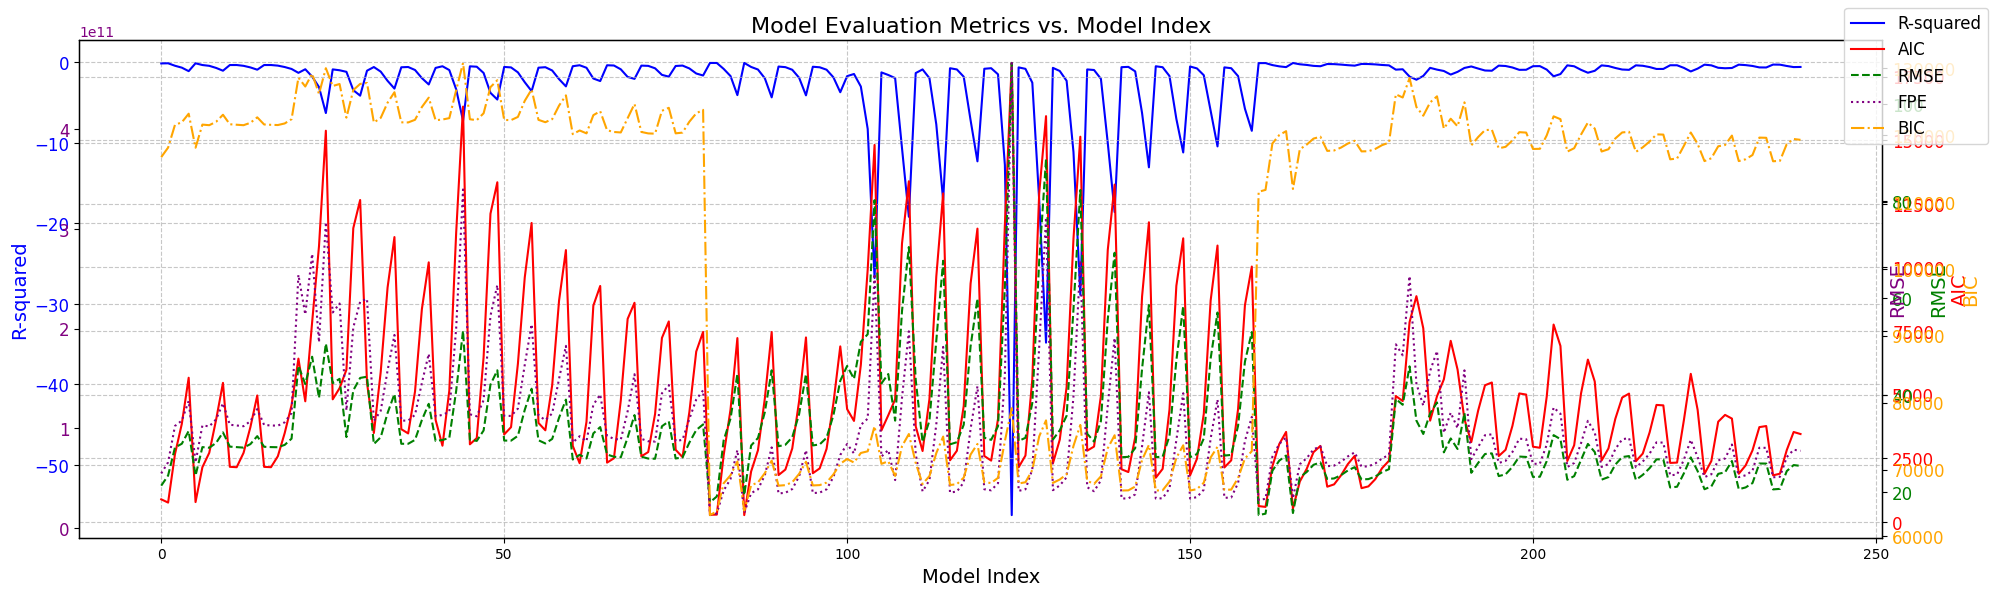

Athlete: A2M2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

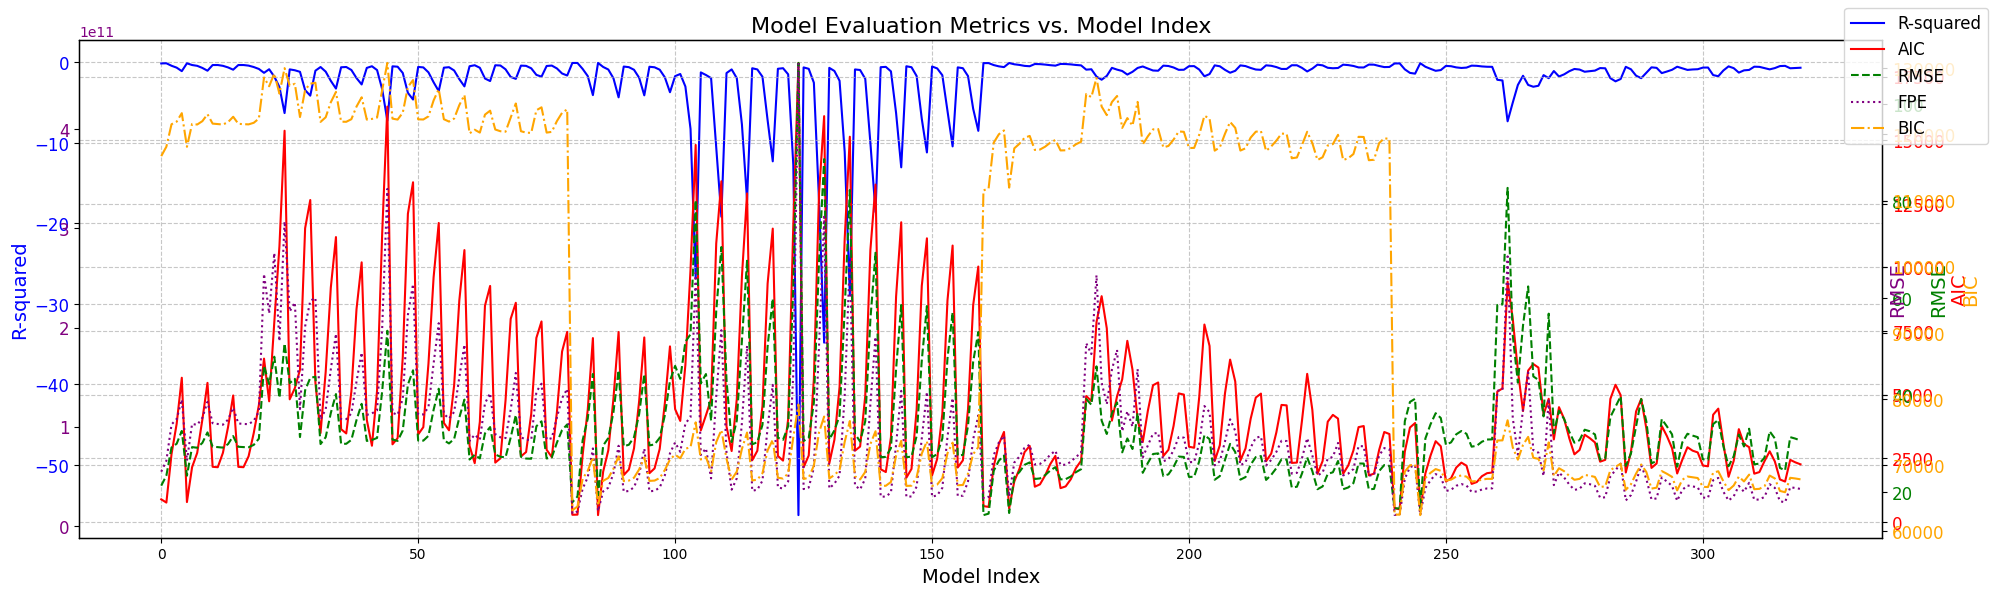

Athlete: A3M1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

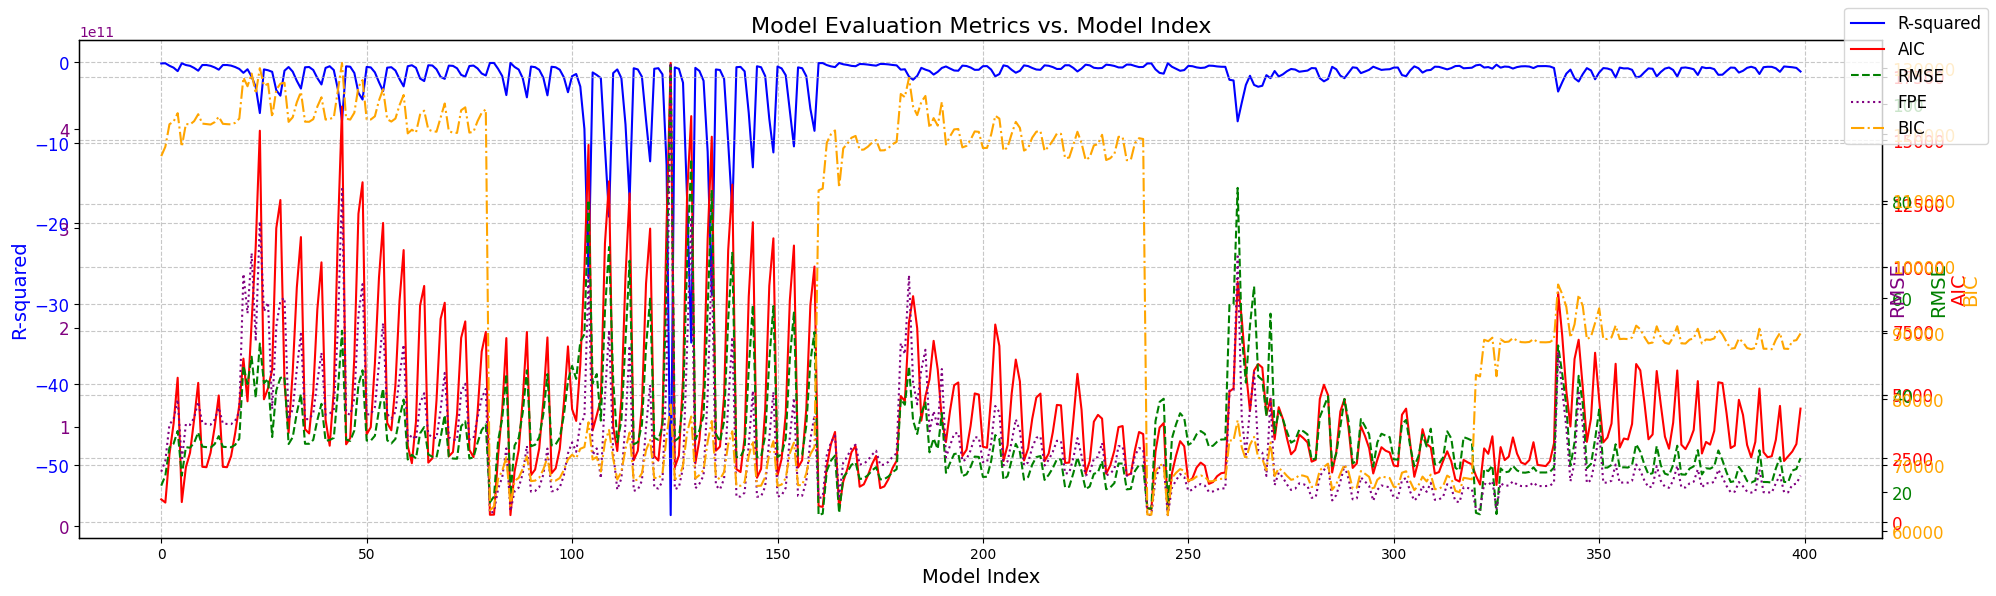

Athlete: A3M2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

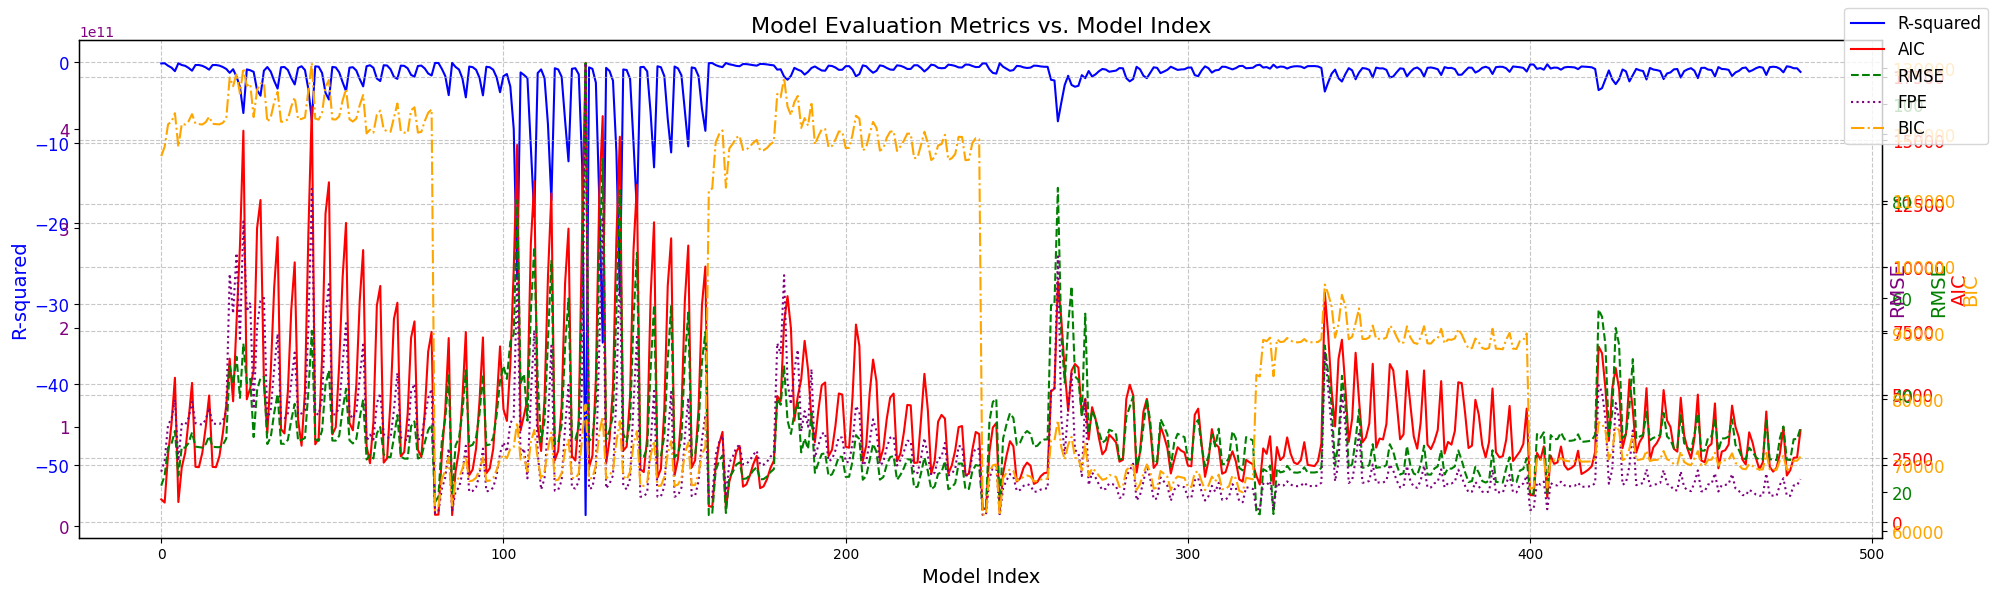

Athlete: A4M1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

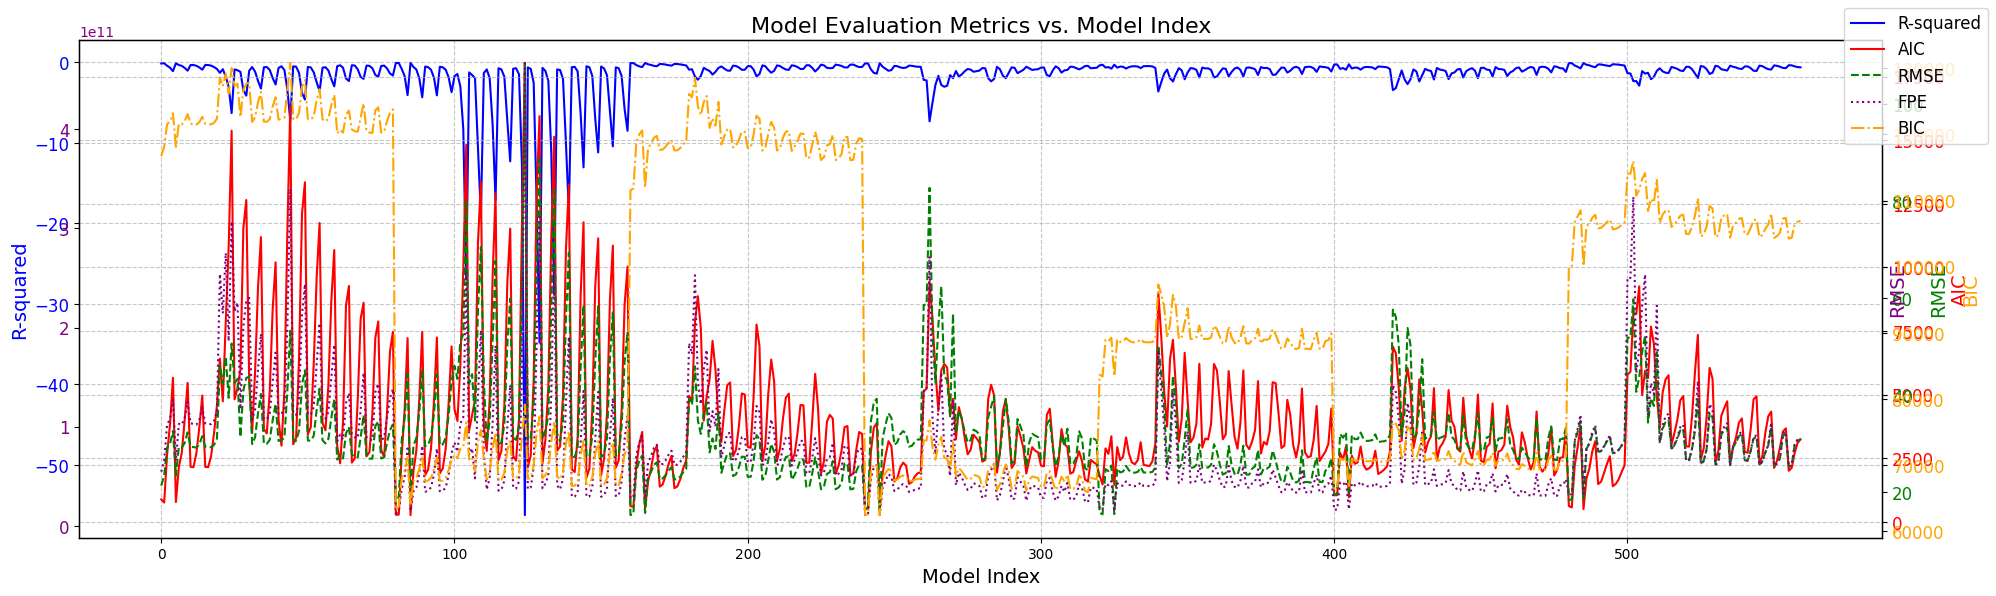

Athlete: A4M2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

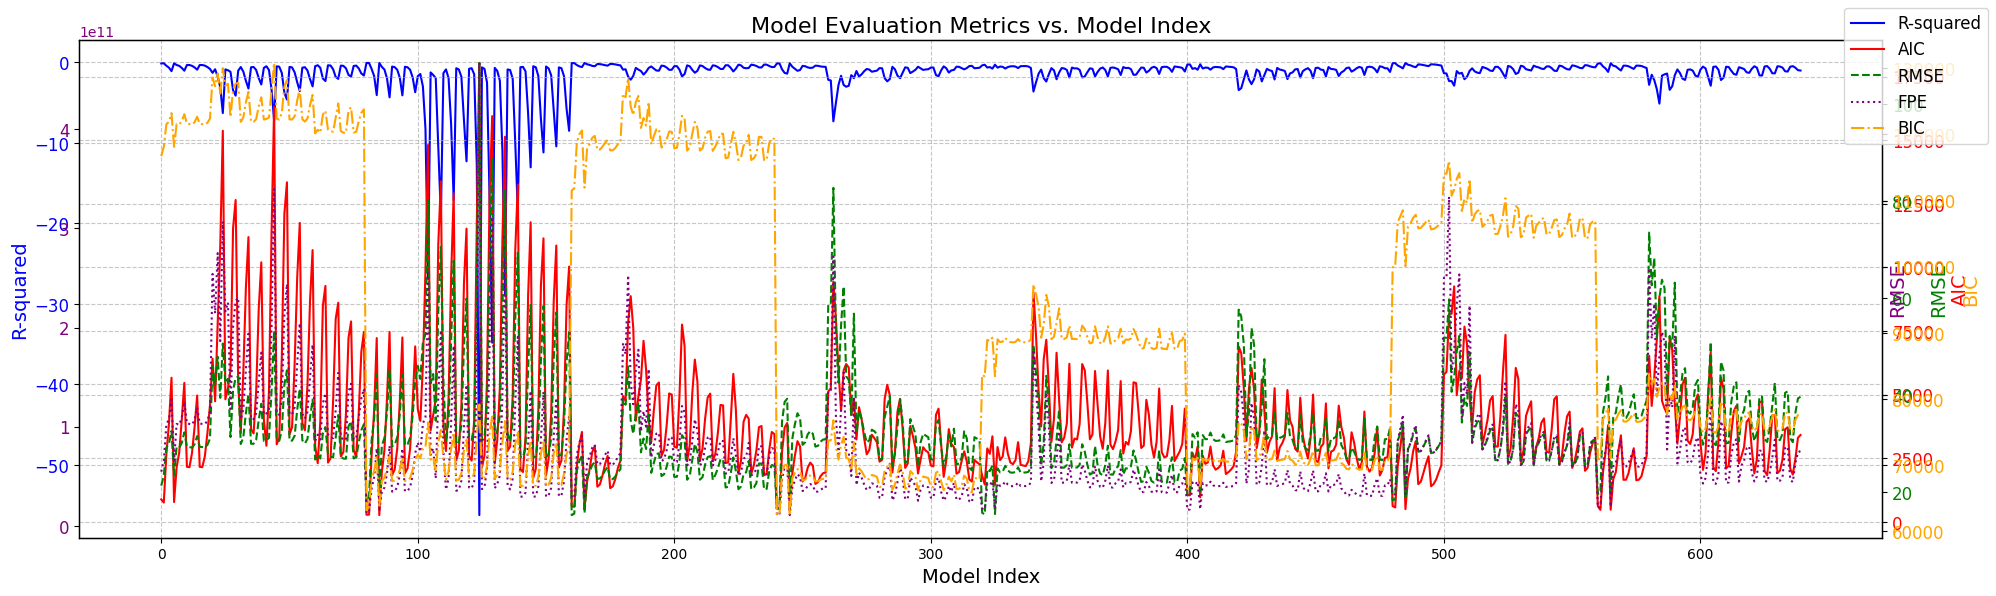

Athlete: A5M1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

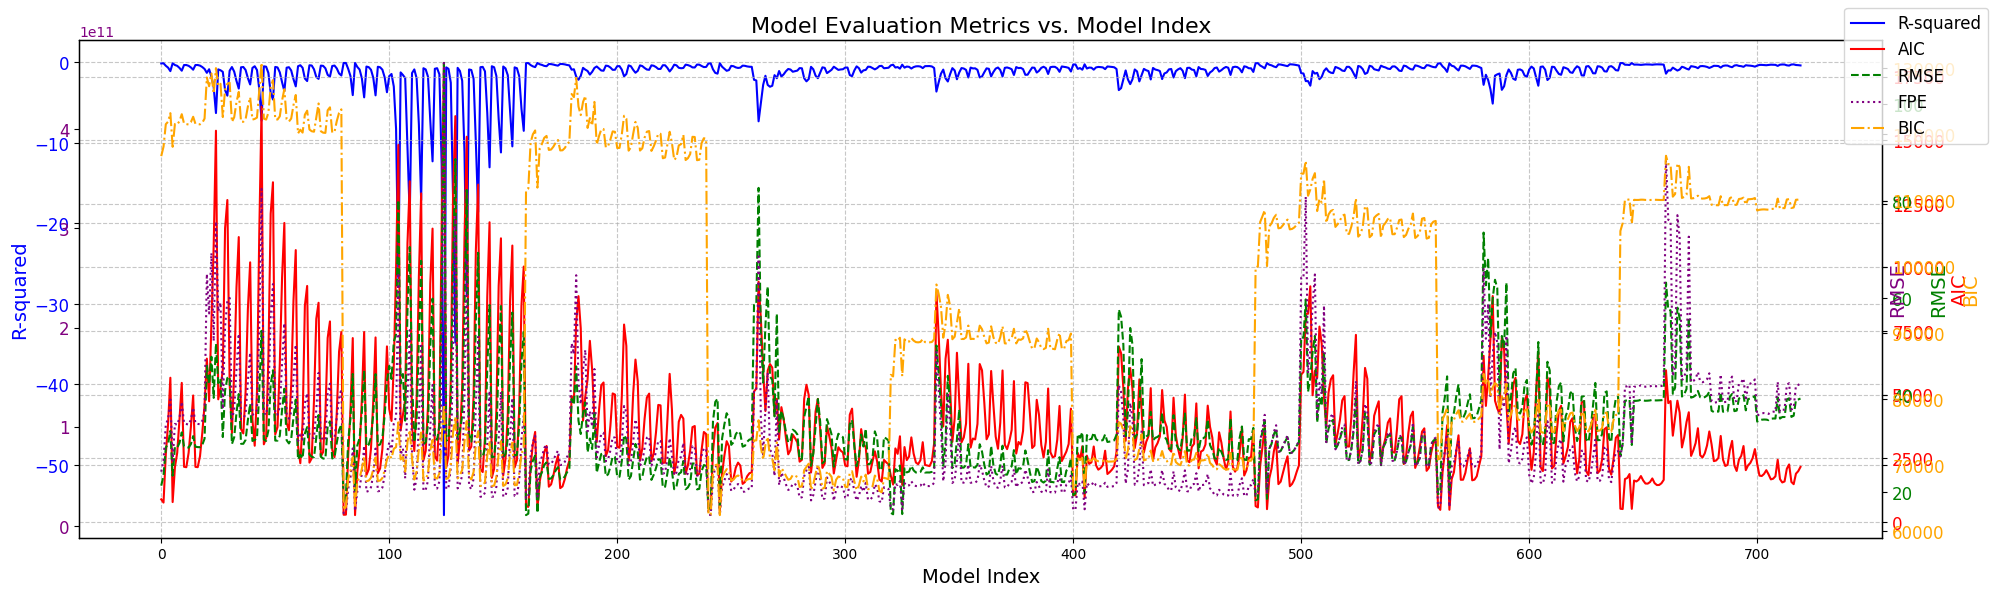

Athlete: A5M2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

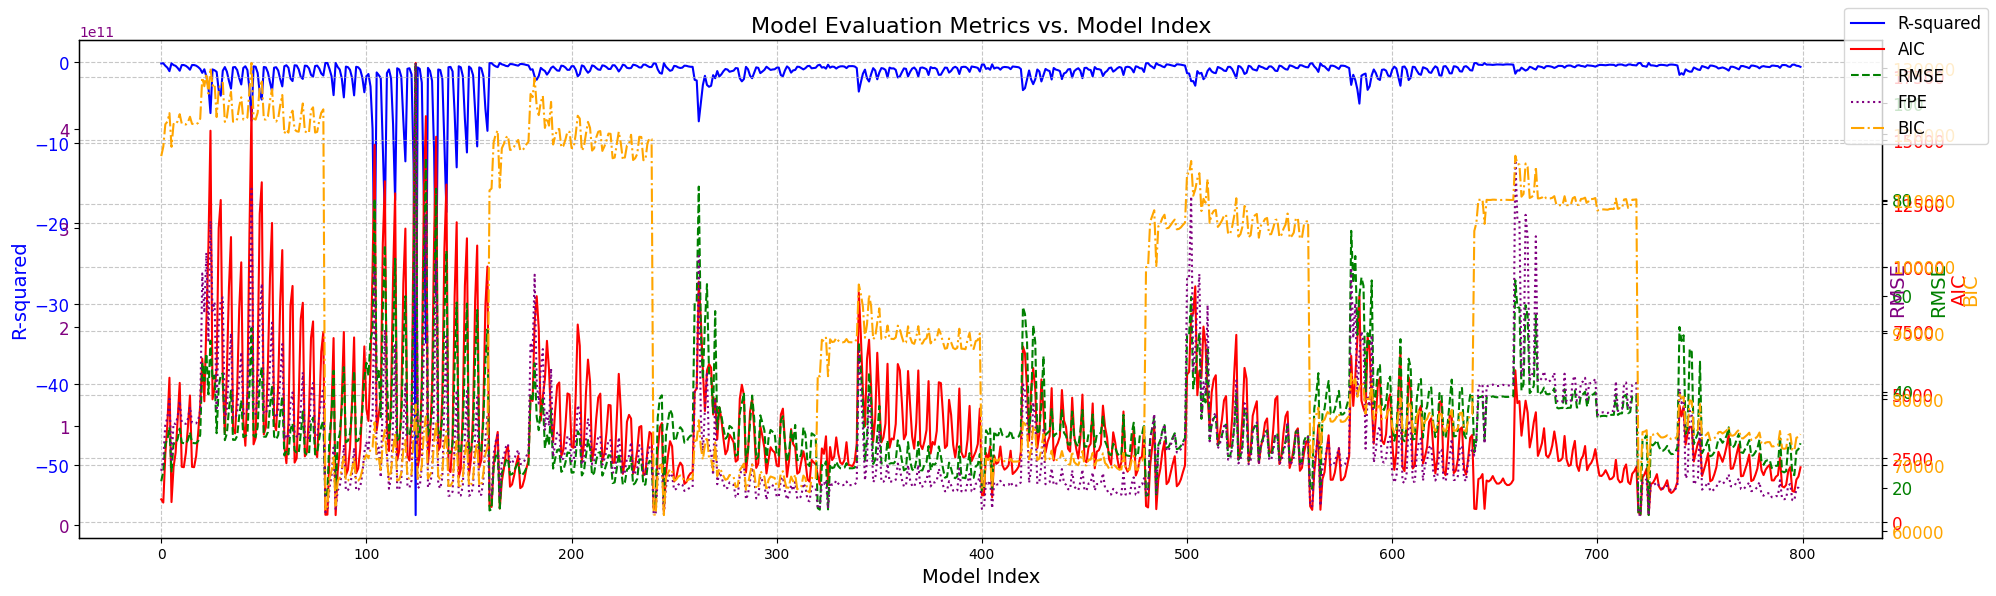

Athlete: A6M1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

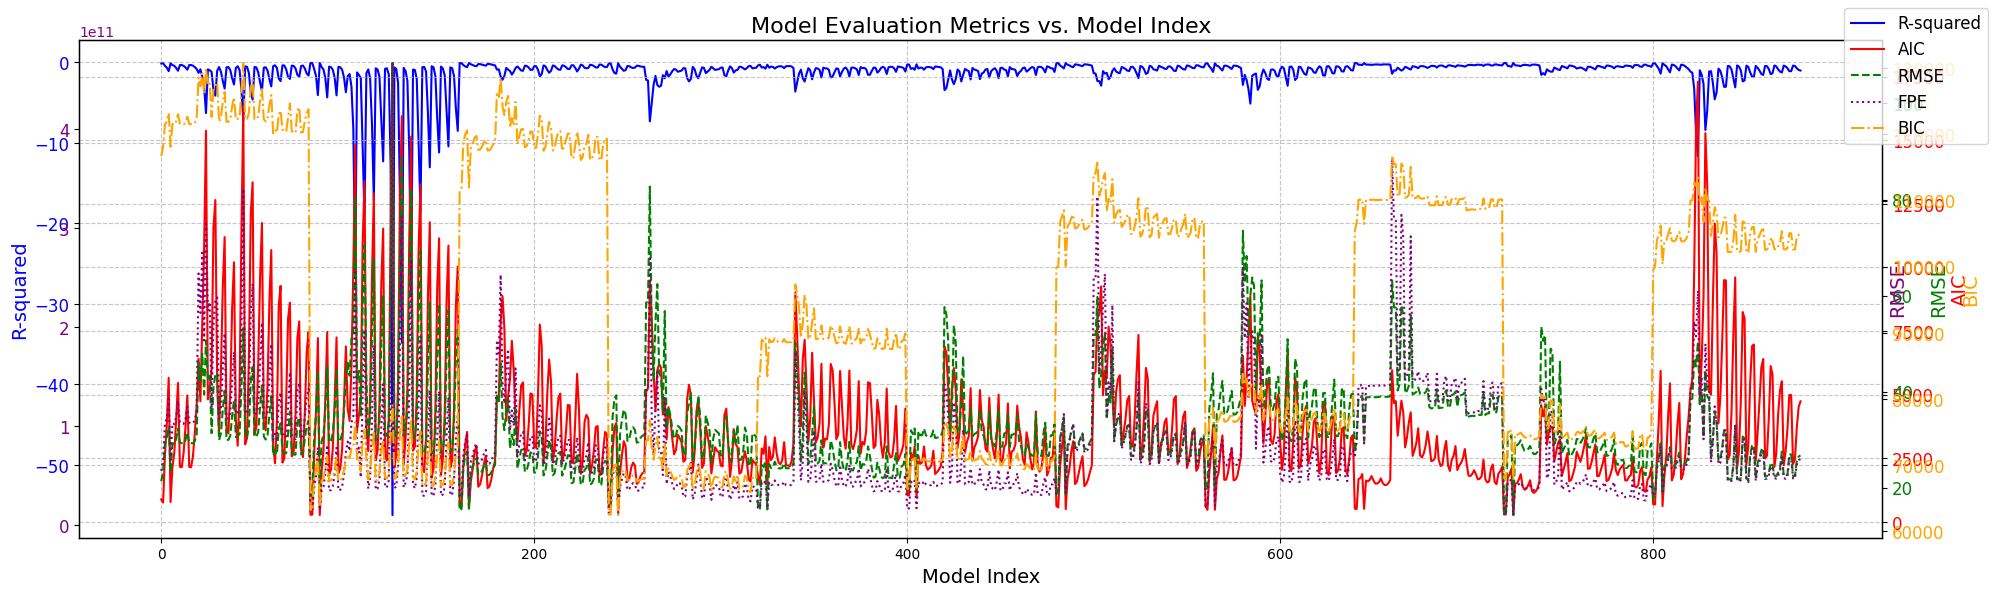

Athlete: A6M2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

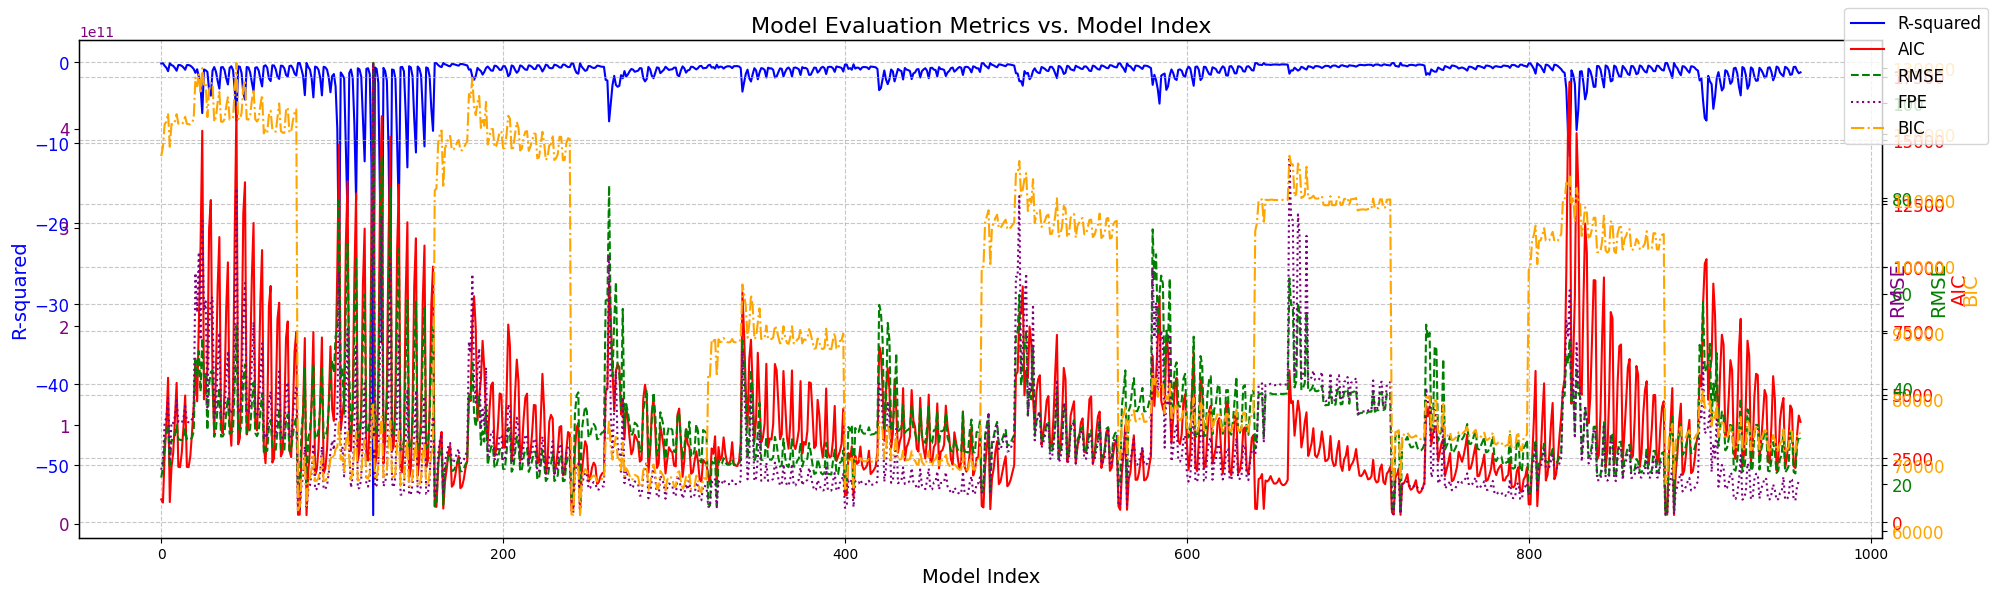

In [122]:
from re import X
# Find the best model structure (time-invariant modelling)
results_df = pd.DataFrame(columns=['Athlete_Code','Model_Index', 'na', 'nb', 'd', 'AIC', 'Rsq','RMSE','BIC','FPE'])
selected_models = pd.DataFrame(columns=['Athlete_Code','ParamCount','ParamValues','Metrics'])  #ParamCount[na:nb:d] || ParamValues[na,nb] || Metrics[Rsq, AIC, FPE]

# Calculate ARX models to the evaluation data with all possible parameters to find the best fit by checking r-squared and AIC
# Define a max for a, b, and delay (d)
na_max = nb_max = xdelay_max = 4
model_count=0

##Loop through parameters
#Starts 1:1:0 .... 3,3,3               (1,na_max|1,nb_max|xdelay_max) (max=4)
#Starts 1:1:0 .... 4,4,4               (1,na_max+1|1,nb_max+1|xdelay_max+1)(max=4)
for i in range(len(athlete_list)):
  data = athlete_list[i]
  model_count=0
  print(f"Athlete: {code_name[i]}")
  for na in range(1,na_max+1):
    for nb in range(1,nb_max+1):
      for d in range(xdelay_max+1):
        #print('\nModel #{} \nwith {} a parameters, {} b parameters and {} time delay'.format(model_count,na,nb,d))
        #load the associated data using dataloader(data, na, nb, d)
        X_loader, y_loader = dataloader(data, na,  nb, d)
        #print("X_loader:",X_loader)#print("y_loader:",y_loader)


        #Correction to use python## Only when values are equal to zero
        if X_loader.empty:#
            print("Skipping model due to empty X_loader.")
            continue # proceed to next iteration
        if y_loader.empty:
            print("Skipping model due to empty y_loader.")
            continue # proceed to next iteration


        ##Calculate the a and b parameters
        # parameters vector [a0...an, b0...bm].T by the formula inv(X.T dot X) dot X.T dot y
        parameters = np.linalg.inv(X_loader.T.dot(X_loader)).dot(X_loader.T).dot(y_loader)
        parameters_a = parameters[:na]
        parameters_b = parameters[na:]


        ## Simulate values of Y
        ysim = np.zeros(len(y_loader)) # the plus one is because the first value is initialized and not simulated
        ysim[0]= y_loader.values[0] # initialize the first value
        max_lag= max(na,nb+d-1)  # Maximum lag across both endogenous and exogenous variables

        for k in range(max_lag, len(X_loader)):
        # Add the contribution from autoregressive terms (endogenous variables)
          for i_a in range(1,na+1):
              #print("parameter a: ",i_a)
              ysim[k] += parameters_a[i_a-1] * ysim[k - i_a]  # Note: parameters_a starts at index 0

        # Add the contribution from exogenous input terms (with delay d)
          for j_b in range(nb):
              #print("parameter b: ",j_b)
              ysim[k] += parameters_b[j_b] * X_loader['u-{}'.format(d+j_b)].iloc[k-j_b]  # Note: parameters_b starts at index 0
              #print('u-{}'.format(d+j_b),j_b,d)


        ## Model evaluation for each generated model use r_squared and aic def above
        # Calculate r-squared and AIC and RMSE and BIC and FPE
        n = len(y_loader)
        SSR = np.sum((y_loader - ysim) ** 2)
        #Calculate usefull Model evaluation parameters
        r_squared = r_2(y_loader, ysim)
        aic =  2 * (na + nb) + len(y_loader) * np.log(1 - r_squared) # Evaluates the complexicity of the Model
        rmse = mse(y_loader, ysim[0:], squared=False)  #Root Mean Squared Error (Less sensitive to outliers: It is less affected by extreme errors compared to RMSE)
        fpe = SSR * (n + k) / (n - k)                  #Final Prediction Error(used for model order selection)(Considers both model fit and complexity) (Asymptotically equivalent to AIC: For large sample sizes, FPE and AIC tend to select the same model)
        bic = n * np.log(SSR / n) + k * np.log(n)      #Bayesian Information Criterion (BIC penalizes model complexity more heavily than AIC.)(Consistent: more likely to select the true model when sample is bigger)


        #print("its regression yield r squared: {}, Akaike's information criteria: {}".format(r_squared, aic))

        # Save relevant information to the empty lists
        new_row = pd.DataFrame({'Athlete_Code': code_name[i],'Model_Index': [model_count], 'na': [na], 'nb': [nb], 'd': [d], 'AIC': [aic], 'Rsq': [r_squared],'RMSE':[rmse], 'BIC':[bic],'FPE':[fpe]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

        # Update the model counter
        model_count += 1



  #Plot for each player/game
  fig, ax1 = plt.subplots(figsize=(20, 6))
  X_axis = np.arange(len(results_df)) #results_df['Model_Index']

  #For R-square Error
  ax1.plot(X_axis, results_df['Rsq'], color='blue', label='R-squared')
  ax1.set_xlabel('Model Index', fontsize=14)  # Increased font size
  ax1.set_ylabel('R-squared', color='blue', fontsize=14)  # Increased font size
  ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)  # Increased tick label size

  #For AIC
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
  ax2.plot(X_axis, results_df['AIC'], color='red', label='AIC')
  ax2.set_ylabel('AIC', color='red', fontsize=14)  # Increased font size
  ax2.tick_params(axis='y', labelcolor='red', labelsize=12)  # Increased tick label size

  #For RMSE
  ax3 = ax1.twinx()
  ax3.plot(X_axis, results_df['RMSE'], color='green', label='RMSE', linestyle='--')
  ax3.set_ylabel('RMSE', color='green', fontsize=14)
  ax3.tick_params(axis='y', labelcolor='green', labelsize=12)

  #For FPE
  ax4 = ax1.twinx()
  ax4.plot(X_axis, results_df['FPE'], color='purple', label='FPE', linestyle=':')
  ax4.set_ylabel('RMSE', color='purple', fontsize=14)
  ax4.tick_params(axis='y', labelcolor='purple', labelsize=12)

  #For BIC
  ax5 = ax4.twinx()
  ax5.plot(X_axis, results_df['BIC'], color='orange', label='BIC', linestyle='-.')
  ax5.set_ylabel('BIC', color='orange', fontsize=14)
  ax5.tick_params(axis='y', labelcolor='orange', labelsize=12)

  # General graphic configs
  fig.legend(loc="upper right", fontsize=12)  # Add a legend for both plots, increased font size
  ax1.grid(True, linestyle='--', alpha=0.7)  # Added grid with dashed lines and transparency
  ax2.grid(True, linestyle='--', alpha=0.7)  # Added grid with dashed lines and transparency
  plt.title('Model Evaluation Metrics vs. Model Index', fontsize=16)  # Added title with increased font size
  plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [193]:
#Select Best Models
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(results_df[['AIC', 'Rsq', 'FPE', 'BIC', 'RMSE']])

# Create a new DataFrame with the normalized metrics
normalized_df = pd.DataFrame(normalized_metrics, columns=['AIC_norm', 'Rsq_norm', 'FPE_norm', 'BIC_norm', 'RMSE_norm'])
selection_df = pd.concat([results_df, normalized_df], axis=1)


##Filtering the Pandas Dataframe
# Set thresholds
r_squared_threshold = 0.999  # Example threshold for R-squared
aic_threshold =  0.001 # Example threshold for AIC
rmse_threshold = 0.1
bic_threshold = 0.1
fpe_threshold = 0.01

# Filter the DataFrame
#Rsq > limit || AIC,RMSE,FPE < limit
filtered_df = results_df[(selection_df['Rsq_norm'] > r_squared_threshold) & (selection_df['AIC_norm'] < aic_threshold) & (selection_df['RMSE_norm'] < rmse_threshold) & (selection_df['BIC_norm'] < bic_threshold) & (selection_df['FPE_norm'] < fpe_threshold) & (selection_df['AIC_norm'] < aic_threshold)]

# Display the filtered DataFrame
#print(filtered_df)



# --- Filtering with percentiles (commented out)(alternative) ---
# r_squared_percentile = 90  # Example: 90th percentile for R-squared
# aic_percentile = 10  # Example: 10th percentile for AIC

# r_squared_threshold_percentile = results_df['Rsq'].quantile(r_squared_percentile / 100)
# aic_threshold_percentile = results_df['AIC'].quantile(aic_percentile / 100)

# filtered_df_percentile = results_df[
#     (results_df['Rsq'] > r_squared_threshold_percentile) & (results_df['AIC'] < aic_threshold_percentile)
# ]

# print(filtered_df_percentile)
filter = pd.DataFrame()
selected_models = pd.DataFrame(columns=['Athlete_Code','ParamCount','ParamValues','Metrics'])  #ParamCount[na:nb:d] || ParamValues[na,nb] || Metrics[Rsq, AIC, FPE]
num_models = na_max*nb_max*(xdelay_max+1)
cases = len(results_df)/(num_models) #12
for i in range(int(cases)):
  print("Case: ",i,"Start: ",(i*num_models),"End: ",(i+1)*num_models)

  #Select each dataset models data
  selected_df = selection_df[(i*num_models):(i+1)*num_models]
  #print(selected_df)
  r_squared_threshold = 0.99
  aic_threshold =  0.01
  filter = selected_df[(selected_df['Rsq_norm'] > r_squared_threshold) & (selected_df['AIC_norm'] < aic_threshold)]
  print(filter)

'''
selected_models = pd.DataFrame(columns=['Athlete_Code','ParamCount','ParamValues','Metrics'])  #ParamCount[na:nb:d] || ParamValues[na,nb] || Metrics[Rsq, AIC, FPE]
num_models = na_max*nb_max*(xdelay_max+1)
cases = len(results_df)/(num_models) #12
for i in range(int(cases)):
  print("Case: ",i,"Start: ",(i*num_models),"End: ",(i+1)*num_models)
  filtered_df_percentile = pd.DataFrame()
  #Select each dataset models data
  selected_df = results_df[(i*num_models):(i+1)*num_models]

  #Define Selection Metrics
  #r_squared_percentile = 90  # Example: 90th percentile for R-squared
  #aic_percentile = 10
  rsq_percentile = 0.0
  aic_percentile = 0.0
  while filtered_df_percentile.empty:
    print("percentile",rsq_percentile)
    r_squared_threshold_percentile = selected_df['Rsq'].quantile(rsq_percentile)
    print(r_squared_threshold_percentile,"ESES")
    aic_threshold_percentile = selected_df['AIC'].quantile(aic_percentile)
    print(aic_threshold_percentile,"ASAS")
    filtered_df_percentile =(selected_df['Rsq'] < r_squared_threshold_percentile) & (selected_df['AIC'] < aic_threshold_percentile)
    rsq_percentile -= 0.01
    aic_percentile += 0.01


#Count Number of Models Per Atleat/Game
cA1M1 = cA1M2 = cA2M1 = cA2M2 = cA3M1 = cA3M2 = cA4M1 = cA4M2 = cA5M1 = cA5M2 = cA6M1 = cA6M2 = 0
for index in results_df['Athlete_Code']:
  if index == 'A1M1':
    cA1M1 += 1
  elif index == 'A1M2':
    cA1M2 += 1
  elif index == 'A2M1':
    cA2M1 += 1
  elif index == 'A2M2':
    cA2M2 += 1
  elif index == 'A3M1':
    cA3M1 += 1
  elif index == 'A3M2':
    cA3M2 += 1
  elif index == 'A4M1':
    cA4M1 += 1
  elif index == 'A4M2':
    cA4M2 += 1
  elif index == 'A5M1':
    cA5M1 += 1
  elif index == 'A5M2':
    cA5M2 += 1
  elif index == 'A6M1':
    cA6M1 += 1
  elif index == 'A6M2':
    cA6M2 += 1
print("cA1M1",cA1M1,"cA1M2",cA1M2,"cA2M1",cA2M1,"cA2M2",cA2M2,"cA3M1",cA3M1,"cA3M2",cA3M2,"cA4M1",cA4M1,"cA4M2",cA4M2,"cA5M1",cA5M1,"cA5M2",cA5M2,"cA6M1",cA6M1,"cA6M2",cA6M2)
filtered_df
'''

Case:  0 Start:  0 End:  80
Empty DataFrame
Columns: [Athlete_Code, Model_Index, na, nb, d, AIC, Rsq, RMSE, BIC, FPE, AIC_norm, Rsq_norm, FPE_norm, BIC_norm, RMSE_norm]
Index: []
Case:  1 Start:  80 End:  160
   Athlete_Code Model_Index na nb  d         AIC       Rsq       RMSE  \
80         A1M2           0  1  1  0  281.777553 -0.064277  17.921437   
81         A1M2           1  1  1  1  287.531627 -0.065667  19.120340   
85         A1M2           5  1  2  0  268.391210 -0.060625  19.398061   

             BIC           FPE  AIC_norm  Rsq_norm  FPE_norm  BIC_norm  \
80  63196.473259  1.277032e+10  0.000753  0.999854  0.008847  0.010743   
81  63758.655077  1.452957e+10  0.001077  0.999829  0.012688  0.018970   
85  63887.227623  1.495471e+10  0.000000  0.999919  0.013616  0.020851   

    RMSE_norm  
80   0.046958  
81   0.059581  
85   0.062505  
Case:  2 Start:  160 End:  240
Empty DataFrame
Columns: [Athlete_Code, Model_Index, na, nb, d, AIC, Rsq, RMSE, BIC, FPE, AIC_norm, Rsq_no

'\nselected_models = pd.DataFrame(columns=[\'Athlete_Code\',\'ParamCount\',\'ParamValues\',\'Metrics\'])  #ParamCount[na:nb:d] || ParamValues[na,nb] || Metrics[Rsq, AIC, FPE]\nnum_models = na_max*nb_max*(xdelay_max+1)\ncases = len(results_df)/(num_models) #12\nfor i in range(int(cases)):\n  print("Case: ",i,"Start: ",(i*num_models),"End: ",(i+1)*num_models)\n  filtered_df_percentile = pd.DataFrame()\n  #Select each dataset models data\n  selected_df = results_df[(i*num_models):(i+1)*num_models]\n\n  #Define Selection Metrics\n  #r_squared_percentile = 90  # Example: 90th percentile for R-squared\n  #aic_percentile = 10\n  rsq_percentile = 0.0\n  aic_percentile = 0.0\n  while filtered_df_percentile.empty:\n    print("percentile",rsq_percentile)\n    r_squared_threshold_percentile = selected_df[\'Rsq\'].quantile(rsq_percentile)\n    print(r_squared_threshold_percentile,"ESES")\n    aic_threshold_percentile = selected_df[\'AIC\'].quantile(aic_percentile)\n    print(aic_threshold_percentil

In [81]:
results_df.sort_values(by='Rsq', ascending=False)[:30]
#Rsq: 1,5,0,16,11,6,15,10,61
#AIC: 1,5,0,6,11,16,15,10,61
#FPE: 0,5,1,60,72,71,62,75,76

Athlete_Code Model_Index na nb  d          AIC       Rsq       RMSE  \
1          A1M1           1  1  1  1   761.251837 -0.102768  23.434915   
5          A1M1           5  1  2  0   781.306219 -0.105343  23.410022   
0          A1M1           0  1  1  0   888.566340 -0.121039  21.349714   
16         A1M1          16  1  4  1  2152.115780 -0.318943  29.296207   
11         A1M1          11  1  3  1  2150.936943 -0.319036  29.281493   
6          A1M1           6  1  2  1  2150.836645 -0.319312  29.293593   
15         A1M1          15  1  4  0  2164.384712 -0.320988  29.362449   
10         A1M1          10  1  3  0  2167.059976 -0.321739  29.389751   
61         A1M1          61  4  1  1  2308.918141 -0.345891  27.712579   
65         A1M1          65  4  2  0  2331.643545 -0.349500  27.774986   
66         A1M1          66  4  2  1  2501.032469 -0.379363  27.307776   
76         A1M1          76  4  4  1  2547.788653 -0.387064  27.172914   
70         A1M1          70  4  3  0  2577.961485 -0.392783  27.313827   
17         A1M1          17  1  4  2  2582.088368 -0.394366  29.266647   
2          A1M1           2  1  1  2  2663.555906 -0.410031  29.211161   
12         A1M1          12  1  3  2  2714.064773 -0.418658  29.186937   
7          A1M1           7  1  2  2  2717.265402 -0.419547  29.160784   
71         A1M1          71  4  3  1  2746.868772 -0.423515  26.936283   
75         A1M1          75  4  4  0  2835.657118 -0.439569  26.950749   
60         A1M1          60  4  1  0  2988.046010 -0.469335  26.735855   
41         A1M1          41  3  1  1  2995.356540 -0.471031  30.764911   
45         A1M1          45  3  2  0  3050.712773 -0.481206  30.848227   
46         A1M1          46  3  2  1  3295.300488 -0.528761  30.569523   
50         A1M1          50  3  3  0  3438.939558 -0.556994  30.643902   
36         A1M1          36  2  4  1  3478.653675 -0.565185  29.977974   
18         A1M1          18  1  4  3  3493.023352 -0.568682  29.750291   
31         A1M1          31  2  3  1  3494.798769 -0.568768  29.922421   
56         A1M1          56  3  4  1  3601.912118 -0.589905  30.046416   
35         A1M1          35  2  4  0  3645.677783 -0.599239  29.980287   
51         A1M1          51  3  3  1  3725.007031 -0.615717  30.623109   

              BIC           FPE  
1   118139.917197  6.581469e+10  
5   118123.463237  6.567494e+10  
0   116713.246769  5.463770e+10  
16  121545.853937  1.027737e+11  
11  121554.786901  1.026971e+11  
6   121577.890400  1.028085e+11  
15  121597.520375  1.032657e+11  
10  121628.621075  1.034846e+11  
61  120702.425081  9.198680e+10  
65  120737.241350  9.240157e+10  
66  120474.667438  8.931909e+10  
76  120381.480257  8.841620e+10  
70  120478.096419  8.935868e+10  
17  121513.523928  1.025399e+11  
2   121534.267998  1.022307e+11  
12  121488.023015  1.020085e+11  
7   121490.849163  1.018521e+11  
71  120262.660204  8.690544e+10  
75  120270.970681  8.699881e+10  
60  120147.060393  8.561695e+10  
41  122336.502281  1.133953e+11  
45  122378.367884  1.140103e+11  
46  122237.875564  1.119596e+11  
50  122275.494242  1.125050e+11  
36  121901.877089  1.076128e+11  
18  121750.409457  1.059296e+11  
31  121889.922602  1.072420e+11  
56  121937.169442  1.081047e+11  
35  121919.825725  1.076572e+11  
51  122248.189354  1.123234e+11

Den(a):  [ 1.63075587 -0.64888876 -0.15005216  0.16549807]
Num(b):  [ 0.4211964   0.98964227 -0.20399756]
[132. 132. 132. ...   0.   0.   0.]
[   0    1    2 ... 4903 4904 4905]


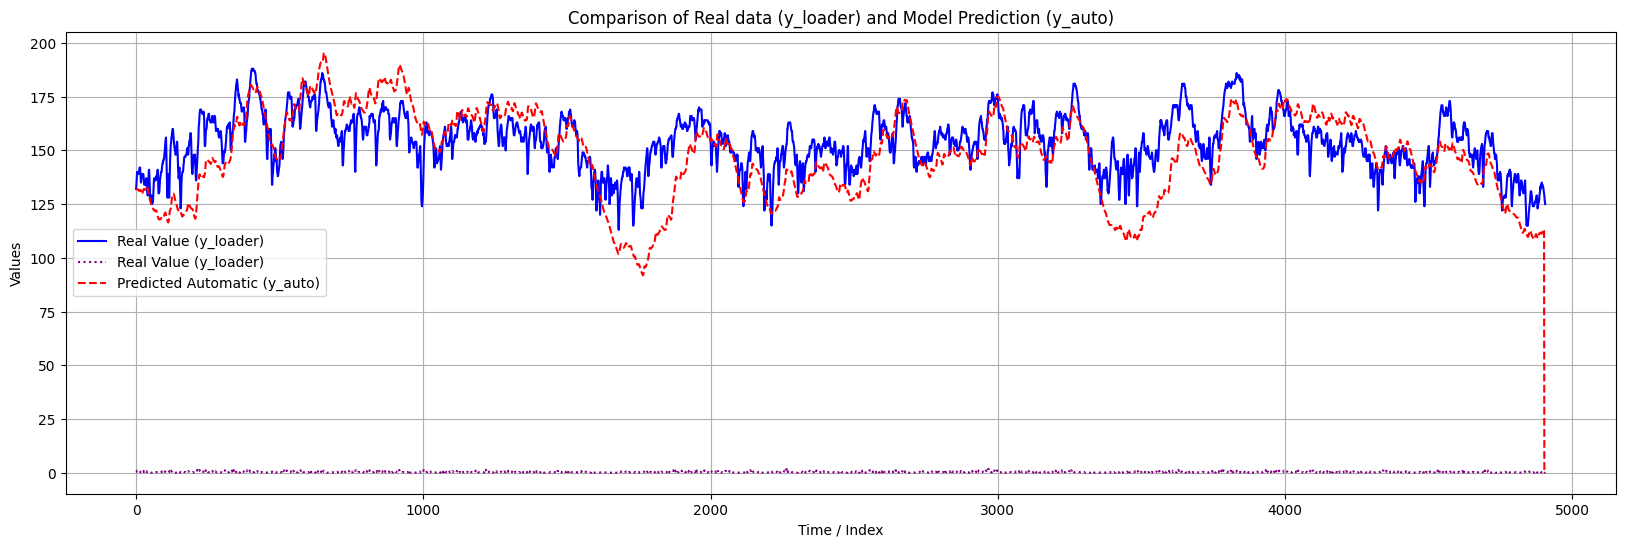

In [125]:
#Simulation best model structure
number_a=4
number_b=3
d=0


# print the relative dataframe and check its columns
X_loader,y_loader = dataloader(data,number_a,number_b,d)
parameters = np.linalg.inv(X_loader.T.dot(X_loader)).dot(X_loader.T).dot(y_loader)
den = parameters[:number_a] #parameters a
num = parameters[number_a:] #parameters b

print("Den(a): ", den)
print("Num(b): ", num)
X_loader.head()

y = np.zeros(len(data))
y_auto = np.zeros(len(data))
y_auto[:max(number_a,number_b+d)] = data['y'][0]
print(y_auto)

#works for (0,1,0),(1,0,0)
for k in range(max(number_a,number_b +d), len(X_loader)):
  ##AUTOMATIC
  # Add the contribution from autoregressive terms (endogenous variables)
  for i_a in range(1, number_a + 1):
      y_auto[k] += den[i_a-1] * y_auto[k - i_a]  # Note: parameters_a starts at index 0
  # Add the contribution from exogenous input terms (with delay d)
  for j_b in range(number_b):
    #print("Input: ",'u-{}'.format(j_b+d))
    y_auto[k] += num[j_b] * X_loader['u-{}'.format(j_b+d)].iloc[k-j_b-d]



#Ploting
plt.figure(figsize=(20, 6))
X_axis = np.arange(0,4906)
print(X_axis)
# Plot the actual values (y_loader)
plt.plot(data['y'], label='Real Value (y_loader)', color='blue')
plt.plot(data['u'], label='Real Value (y_loader)', color='purple', linestyle=':')
# Plot the original data (y)    *AUTOMATIC
plt.plot(X_axis, y_auto, label='Predicted Automatic (y_auto)', color='red', linestyle='--')

# Add labels and title
plt.xlabel('Time / Index')
plt.ylabel('Values')
plt.title('Comparison of Real data (y_loader) and Model Prediction (y_auto)')
plt.legend()  # Add a legend
plt.grid(True) # Add grid lines for better readability
# Adjust the y-axis limits if necessary for better visualization
#plt.ylim([50, 200])
plt.show()

In [105]:
#2ºSystem Identification
def calcmodel(data, na, nb, d):
    # Load the associated data using dataloader(data, na, nb, d)
    X_loader, y_loader = dataloader(data, na, nb, d)


    # Estimate the a and b parameters vector [a0...an, b0...bm].T by the formula inv(X.T dot X) dot X.T dot y
    params = np.linalg.inv(X_loader.T @ X_loader) @ X_loader.T @ y_loader
    #params = np.linalg.solve(X_loader.T, X_loader) @ X_loader.T @ y_loader
    params = params.values


    parameters_a = params[:na]
    parameters_b = params[na:]


    # Optional: Calculate the predicted values of Y via Matrix-Vector multiplication (this is for prediction, not simulation)
    Y_pred = np.dot(X_loader, params)


    #Calculate a simulation using the predicted parameters use the following structure:
    ysim = np.zeros((len(X_loader)+1,1))  # the plus one is because the first value is initialized and not simulated

    ysim[0] = y_loader.values[0]    # initialize the first value
    max_lag = max(na, nb + d)  # Maximum lag across both endogenous and exogenous variables

    for k in range(max_lag, len(X_loader)):
        #Add the contribution from autoregressive terms (endogenous variables)
        for i_a in range(1, na + 1):
            #ysim[k] += parameters_a[i_a - 1] * ysim[k - i_a]
            ysim[k] += parameters_a[i_a - 1] * X_loader.iloc[k, i_a]

        #Add the contribution from exogenous input ter\ms (with delay d)
        for j_b in range(1, nb + 1):
            #ysim[k] += estimation[i_a - 1] * ysim[k - i_a - X_loader['u-{}'.format(d)]]                    #to get the column at delay u-d use this syntax X_loader['u-{}'.format(d)]
            ysim[k] += parameters_b[j_b-1] * X_loader['u-{}'.format(d)].iloc[k-j_b]


    # Calculate r-squared
    y_loader = y_loader.values.reshape(-1,1)
    SS_res = np.sum((y_loader - ysim[1:]) ** 2)  # Residual sum of squares
    SS_tot = np.sum((y_loader - np.mean(y_loader)) ** 2)  # Total sum of squares
    rsq = 1 - (SS_res / SS_tot)
    #print("ss_red:",SS_res,"ss_tot",SS_tot,"RSQ:",rsq)


    # Calculate AIC
    n = len(y_loader)  # Number of observations
    # Number of parameters (including intercept)
    aic =  2 * (na + nb) + len(y_loader) * np.log(1 - rsq) # Evaluates the complexicity of the Model


    return Y_pred, ysim, params, rsq, aic




print(calcmodel(data,0,1,0))
print(calcmodel(data,1,0,0))


(array([ 18.0618122 ,  12.90129443,   7.74077666, ..., 116.11164985,
        87.72880211,  82.56828434]), array([[125.        ],
       [ 18.0618122 ],
       [ 12.90129443],
       ...,
       [116.11164985],
       [ 87.72880211],
       [  0.        ]]), array([258.02588856]), -36.757397333616865, 28114.606494457003)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
pds = pd.DataFrame(columns=["Athlete", "na", "nb", "d", "Params", "RSQ", "AIC"])

# Parameter ranges
na_max = nb_max = xdelay_max = 3

for i in range(len(athlete_list)):
    print(f"Athlete: {code_name[i]}")


In [ ]:
pds

In [ ]:
# Initialize an empty DataFrame to store results
pds = pd.DataFrame(columns=["Athlete", "na", "nb", "d", "Params", "RSQ", "AIC"])

# Parameter ranges
na_max = nb_max = xdelay_max = 3
# Iterate over each athlete
for i in range(len(athlete_list)):
    print(f"Athlete: {code_name[i]}")
    athlete = athlete_list[i]
    # Iterate over possible values of na, nb, and d
    for na in range(1,na_max+1):
      for nb in range(1,nb_max+1):
        for d in range(1,xdelay_max+1):
              # Calculate model with specified parameters
              Y_pred, ysim, params, rsq, aic = calcmodel(athlete, na=na, nb=nb, d=d)


              # Add the result as a new row to the DataFrame
              pds = pd.concat([pds, pd.DataFrame({
                  "Athlete": f"{code_name[i]}",
                  "na": [na],
                  "nb": [nb],
                  "d": [d],
                  "Params": [params],
                  "RSQ": [rsq],
                  "AIC": [aic]
              })], ignore_index=True)

# Display final DataFrame with all results
#print(pds)


#Logs
'''
Run   Time
1     24:23       #First version(5)
2     24:23          #Add to dataframe(5)
3     25:xx        #No Idea(5)
4     5:xx         #Normal(3)
'''

In [ ]:

A1M1 = pds[pds['Athlete'] == "A4M1"]
percentile_75_1 = A1M1['AIC'].quantile(0.9)
percentile_75_2 = np.percentile(A1M1['AIC'],90)
#print(percentile_75_1, percentile_75_2)
#A1M1 = A1M1[A1M1['RSQ'] >= percentile_75]
#print(A1M1)

percentile_95 = A1M1['RSQ'].quantile(0.75)
fig, ax1 = plt.subplots()
plt.figure(figsize=(10, 6))
ax1.plot(A1M1["RSQ"])
ax1.set_xlabel('Model')
ax1.set_ylabel('RSQ')
ax2 = ax1.twinx()
ax2.plot(A1M1["AIC"], color='red')
ax2.set_ylabel('AIC', color='red')
ax1.legend(['RSQ'], loc='upper left')
ax2.legend(['AIC'], loc='upper right')
plt.show()
#pds
#Logs
'''
Total: 1500 Models
'''
A1M1[['na', 'nb','d','RSQ','AIC']][0:]

In [ ]:
#3 Biological interpretation

# 2º Practical assignment

In [ ]:
uploaded = files.upload()

In [ ]:
# Mutant 334

M334_C1_In_df = pd.read_csv('Mutation334_C1_In.csv', names=['u'])
M334_C2_In_df = pd.read_csv('Mutation334_C2_In.csv', names=['u'])
M334_C3_In_df = pd.read_csv('Mutation334_C3_In.csv', names=['u'])
M334_C4_In_df = pd.read_csv('Mutation334_C4_In.csv', names=['u'])
M334_C5_In_df = pd.read_csv('Mutation334_C5_In.csv', names=['u'])
M334_C6_In_df = pd.read_csv('Mutation334_C6_In.csv', names=['u'])

M334_C1_Out_df = pd.read_csv('Mutation334_C1_Out.csv', names=['y'])
M334_C2_Out_df = pd.read_csv('Mutation334_C2_Out.csv', names=['y'])
M334_C3_Out_df = pd.read_csv('Mutation334_C3_Out.csv', names=['y'])
M334_C4_Out_df = pd.read_csv('Mutation334_C4_Out.csv', names=['y'])
M334_C5_Out_df = pd.read_csv('Mutation334_C5_Out.csv', names=['y'])
M334_C6_Out_df = pd.read_csv('Mutation334_C6_Out.csv', names=['y'])

Mutant_334_list = [M334_C1_In_df,
M334_C2_In_df,
M334_C3_In_df,
M334_C4_In_df,
M334_C5_In_df,
M334_C6_In_df,
M334_C1_Out_df,
M334_C2_Out_df,
M334_C3_Out_df,
M334_C4_Out_df,
M334_C5_Out_df,
M334_C6_Out_df]

# Mutant 343

M343_C1_In_df = pd.read_csv('Mutation343_C1_In.csv', names=['u'])
M343_C2_In_df = pd.read_csv('Mutation343_C2_In.csv', names=['u'])
M343_C3_In_df = pd.read_csv('Mutation343_C3_In.csv', names=['u'])
M343_C4_In_df = pd.read_csv('Mutation343_C4_In.csv', names=['u'])
M343_C5_In_df = pd.read_csv('Mutation343_C5_In.csv', names=['u'])
M343_C6_In_df = pd.read_csv('Mutation343_C6_In.csv', names=['u'])

M343_C1_Out_df = pd.read_csv('Mutation343_C1_Out.csv', names=['y'])
M343_C2_Out_df = pd.read_csv('Mutation343_C2_Out.csv', names=['y'])
M343_C3_Out_df = pd.read_csv('Mutation343_C3_Out.csv', names=['y'])
M343_C4_Out_df = pd.read_csv('Mutation343_C4_Out.csv', names=['y'])
M343_C5_Out_df = pd.read_csv('Mutation343_C5_Out.csv', names=['y'])
M343_C6_Out_df = pd.read_csv('Mutation343_C6_Out.csv', names=['y'])

Mutant_343_list = [M343_C1_In_df,
M343_C2_In_df,
M343_C3_In_df,
M343_C4_In_df,
M343_C5_In_df,
M343_C6_In_df,
M343_C1_Out_df,
M343_C2_Out_df,
M343_C3_Out_df,
M343_C4_Out_df,
M343_C5_Out_df,
M343_C6_Out_df]

# WildType

WildType_C1_In_df = pd.read_csv('WildType_C1_In.csv', names=['u'])
WildType_C2_In_df = pd.read_csv('WildType_C2_In.csv', names=['u'])
WildType_C3_In_df = pd.read_csv('WildType_C3_In.csv', names=['u'])
WildType_C4_In_df = pd.read_csv('WildType_C4_In.csv', names=['u'])
WildType_C5_In_df = pd.read_csv('WildType_C5_In.csv', names=['u'])
WildType_C6_In_df = pd.read_csv('WildType_C6_In.csv', names=['u'])

WildType_C1_Out_df = pd.read_csv('WildType_C1_Out.csv', names=['y'])
WildType_C2_Out_df = pd.read_csv('WildType_C2_Out.csv', names=['y'])
WildType_C3_Out_df = pd.read_csv('WildType_C3_Out.csv', names=['y'])
WildType_C4_Out_df = pd.read_csv('WildType_C4_Out.csv', names=['y'])
WildType_C5_Out_df = pd.read_csv('WildType_C5_Out.csv', names=['y'])
WildType_C6_Out_df = pd.read_csv('WildType_C6_Out.csv', names=['y'])

WildType_list = [WildType_C1_In_df,
WildType_C2_In_df,
WildType_C3_In_df,
WildType_C4_In_df,
WildType_C5_In_df,
WildType_C6_In_df,
WildType_C1_Out_df,
WildType_C2_Out_df,
WildType_C3_Out_df,
WildType_C4_Out_df,
WildType_C5_Out_df,
WildType_C6_Out_df]

# Unknown

Unknown_C1_In_df = pd.read_csv('Unknown_C1_In.csv', names=['u'])
Unknown_C2_In_df = pd.read_csv('Unknown_C2_In.csv', names=['u'])

Unknown_C1_Out_df = pd.read_csv('Unknown_C1_Out.csv', names=['y'])
Unknown_C2_Out_df = pd.read_csv('Unknown_C2_Out.csv', names=['y'])

UnknownType_list = [Unknown_C1_In_df,
Unknown_C2_In_df,
Unknown_C1_Out_df,
Unknown_C2_Out_df]


In [ ]:
def dataloader(data, na, nb, d):

    # Initialize empty arrays for lagged features
    u = data['u']
    X = pd.DataFrame()
    y = data['y']


    # Create lagged features for input ('b' parameters)
    for i in range(0,nb):
        X['u-{}'.format(i + d)] = u.shift(i + d)
    # Create lagged features for output ('a' parameters)
    for i in range(1,na+1):
        X['y-{}'.format(i)] = y.shift(i)


    X = X.iloc[max(na,nb+d):]
    # Set the target values
    y = y[max(na,nb+d):]

    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    return X, y